## Decision Tree

### Q1 GINI Calculation


In [9]:
# class 1 with 9 instances
# class 2 with 7 instances

GINI = 1 - ((9/16)**2) - ((7/16)**2)
print('GINI value: ', GINI)

GINI value:  0.4921875


### Calculate the GINI values of the nodes with a 1 / 4 split, 2/1 split and 1/1 split

In [6]:
# 1/4 split

GINI = 1 - ((1/5)**2) - ((4/5)**2)
print('GINI value: ', GINI)

GINI value:  0.31999999999999984


In [7]:
# 2/1 split

GINI = 1 - ((2/3)**2) - ((1/3)**2)
print('GINI value: ', GINI)

GINI value:  0.4444444444444445


In [8]:
# 1/1 split

GINI = 1 - ((1/2)**2) - ((1/2)**2)
print('GINI value: ', GINI)

GINI value:  0.5


###  Overall GINI value of a split into the above three nodes (weighted sum of the individual GINI values)

In [10]:
GINI_1 = ((5/8)*0.32) - ((3/8)*0.44)
print('GINI for 1st and 2nd split: ', GINI_1)
GINI_2 = ((5/7)*0.32) - ((2/7)*0.5)
print('GINI for 1st and 3rd split: ', GINI_2)
GINI_3 = ((3/5)*0.44) - ((2/5)*0.5)
print('GINI for 2nd and 3rd split: ', GINI_3)

GINI for 1st and 2nd split:  0.035
GINI for 1st and 3rd split:  0.08571428571428574
GINI for 2nd and 3rd split:  0.064


## Q2a Decision Tree for Iris Data

### Load the data

In [47]:
import numpy as np
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pydotplus
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [14]:
df = pd.read_csv('data/iris.csv')

### Explore the Data

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [15]:
df.shape

(150, 5)

In [16]:
df.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [17]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


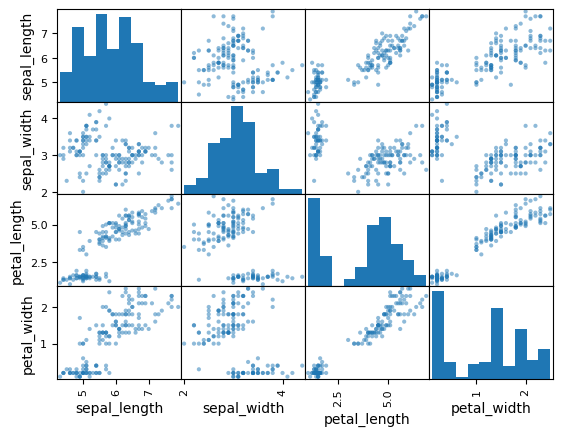

In [18]:
scatter_matrix(df)
plt.show()

**Looks easy to seperate out one of the species. For example using petal_length and petal_width. Maybe harder to seperate the other two classes(species)**

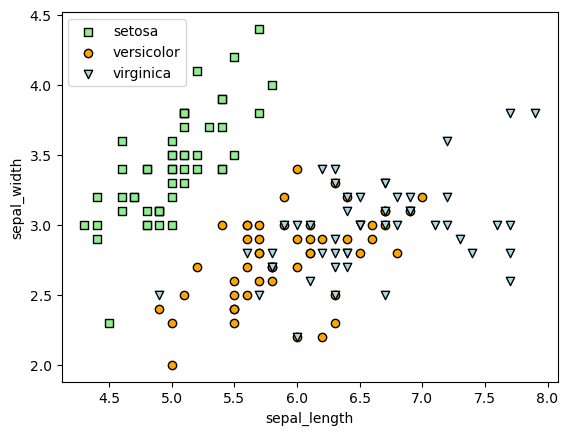

In [20]:
# sepal_length and sepal_width for each species
d = np.array(df)
plt.scatter(
 d[d[:,4] == "setosa", 0], d[d[:,4] == "setosa", 1],
 c='lightgreen', marker='s', edgecolor='black',
 label='setosa'
)
plt.scatter(
 d[d[:,4] == "versicolor", 0], d[d[:,4] == "versicolor", 1],
 c='orange', marker='o', edgecolor='black',
 label='versicolor'
)
plt.scatter(
 d[d[:,4] == "virginica", 0], d[d[:,4] == "virginica", 1],
 c='lightblue', marker='v', edgecolor='black',
 label='virginica'
)
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend(loc="upper left")
plt.show()

**sepal_length and sepal_width seems to seperate the setosa. But not really because we can't draw a diagonal line in a decision tree**

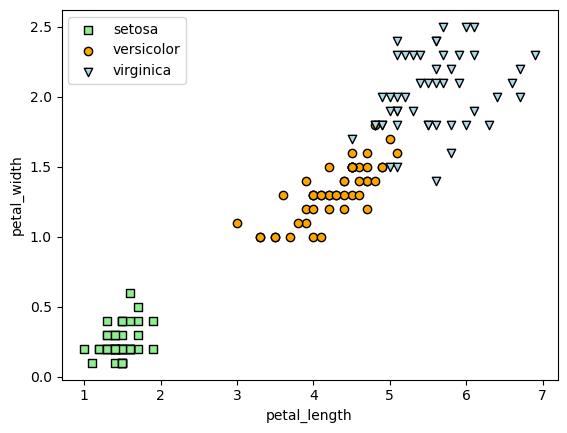

In [21]:
# petal_length and petal_width for each species
d = np.array(df)
plt.scatter(
 d[d[:,4] == "setosa", 2], d[d[:,4] == "setosa", 3],
 c='lightgreen', marker='s', edgecolor='black',
 label='setosa'
)
plt.scatter(
 d[d[:,4] == "versicolor", 2], d[d[:,4] == "versicolor", 3],
 c='orange', marker='o', edgecolor='black',
 label='versicolor'
)
plt.scatter(
 d[d[:,4] == "virginica", 2], d[d[:,4] == "virginica", 3],
 c='lightblue', marker='v', edgecolor='black',
 label='virginica'
)
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend(loc="upper left")
plt.show()

## Q2b Train the model

In [25]:
#X = df[["sepal_length","sepal_width","petal_length","petal_width"]]
X = df.drop(columns = 'species')
y = df["species"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=25, random_state=1, stratify=y)

In [45]:
tree = DecisionTreeClassifier(max_depth = 2)
tree.fit(X_train,y_train)
#Predict the response for test dataset
y_hat = tree.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_hat))
# confusion matrix
cm = confusion_matrix(y_test, y_hat)
print(cm)

Accuracy: 0.92
[[8 0 0]
 [0 8 1]
 [0 1 7]]


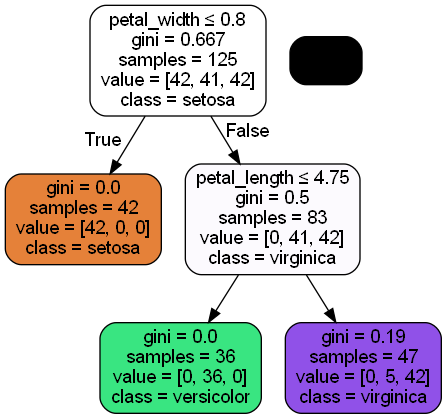

In [46]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus
feature_names = ["sepal_length","sepal_width","petal_length","petal_width"]
target_names = ["setosa", "versicolor", "virginica"]
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,
 filled=True, rounded=True,
 special_characters=True, feature_names = feature_names,
 class_names = target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('plots/iris.png')
Image(graph.create_png())

## Q3 Decision Tree for Diabetes data

**Load the data**

In [64]:
# How to read a csv file with no column names and set the names of the Dtaframe
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
df = pd.read_csv("data/diabetes.csv", header=None, names=col_names)

### Explore the data

In [65]:
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [66]:
print(df.shape)
df.describe()

(768, 9)


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Count values means no missing data**

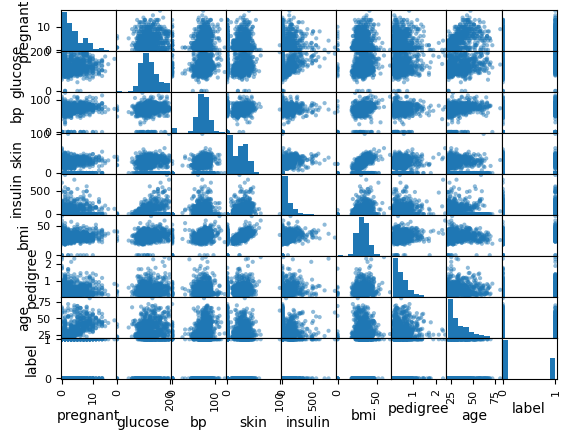

In [67]:
scatter_matrix(df)
plt.show()

**No clear seperation of values shown**

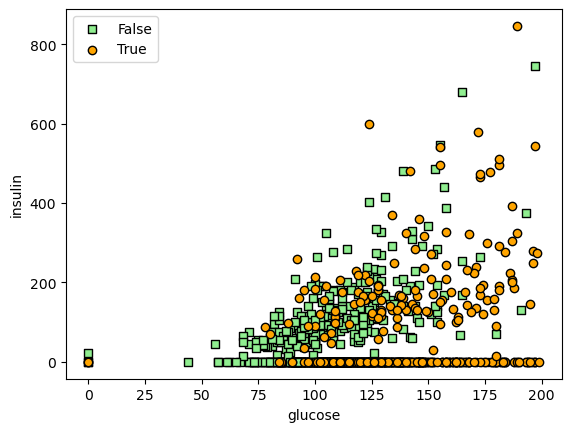

In [70]:
# glucose and insulin for each label
d = np.array(df)
plt.scatter(
 d[d[:,8] == 0, 1], d[d[:,8] == 0, 4],
 c='lightgreen', marker='s', edgecolor='black',
 label='False'
)
plt.scatter(
 d[d[:,8] == 1, 1], d[d[:,8] == 1, 4],
 c='orange', marker='o', edgecolor='black',
 label='True'
)

plt.xlabel('glucose')
plt.ylabel('insulin')
plt.legend(loc="upper left")
plt.show()

**can see some useful cuts (decisions) but not as clear cut as in the iris data. 0 for insulin and glucose greater than 80 seems to be mostly positives.**

In [81]:
X = df['glucose', 'insulin']
y = df.label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=25, random_state=1, stratify=y)

KeyError: ('glucose', 'insulin')

In [78]:
tree = DecisionTreeClassifier(max_depth = 3)
tree.fit(X_train,y_train)
#Predict the response for test dataset
y_hat = tree.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_hat))
# confusion matrix
cm = confusion_matrix(y_test, y_hat)
print(cm)

Accuracy: 0.72
[[14  2]
 [ 5  4]]


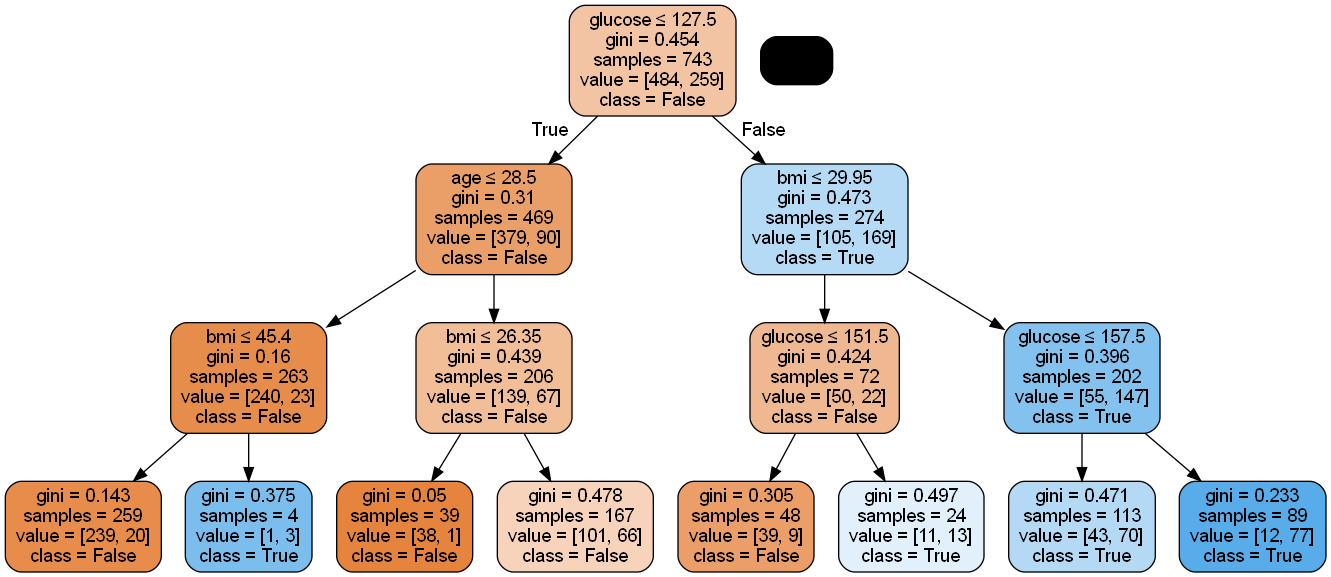

In [79]:
feature_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']
target_names = ['False', 'True']
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,
 filled=True, rounded=True,
 special_characters=True, feature_names = feature_names,
 class_names = target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('plots/diabetes.png')
Image(graph.create_png())